<h1>Stroke Prediction</h1>

[![Typing SVG](https://readme-typing-svg.herokuapp.com?font=Fira+Code&pause=1000&random=false&width=435&lines=Stroke+Prediction;Machine+Learning%3A;By+Ahmad+Rizki)](https://git.io/typing-svg)
## Author
- Nama: Ahmad Rizki
- Email: 18221071@std.stei.itb.ac.id
- Asal: Palu, Sulawesi Tengah

## **Library Import**

Mengimport library yang digunakan untuk membangun model machine learning dan melakukan eksplorasi data.

In [767]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## **Data Loading**

Mengimport dataset yang digunakan untuk membangun model machine learning.

In [768]:
data_path = './healthcare-dataset-stroke-data.csv'
df = pd.read_csv(data_path)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Exploratory Data Analysis**

Melihat informasi dari dataset yang digunakan untuk membangun model machine learning.

In [769]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Melihat statistik deskriptif dari dataset yang digunakan untuk membangun model machine learning.

In [770]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### **Univariate Analysis**

#### Categorical Features

Membuat list kolom yang berisi data kategorikal.

In [771]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

**Fitur Gender**

Melihat presentasi dari distribusi fitur gender

        jumlah sampel  persentase
gender                           
Female           2994        58.6
Male             2115        41.4
Other               1         0.0


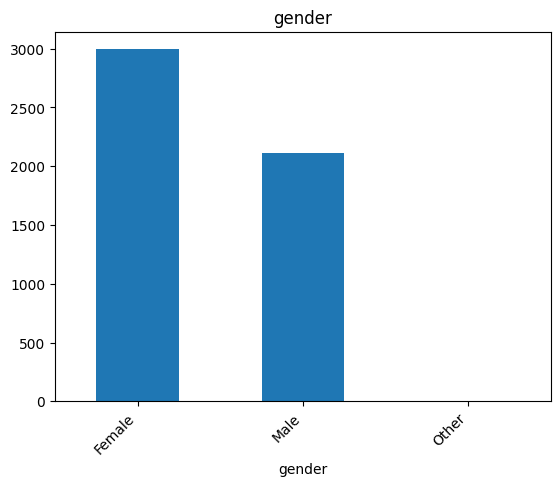

In [772]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);
ax = count.plot(kind='bar', title=feature)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

**Fitur Hypertension**

Melihat presentasi dari distribusi fitur hypertension

              jumlah sampel  persentase
hypertension                           
0                      4612        90.3
1                       498         9.7


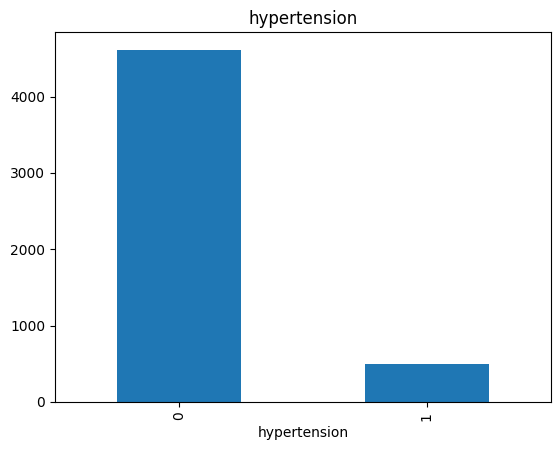

In [773]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

**Fitur Heart Disease**

Melihat presentasi dari distribusi fitur heart disease

               jumlah sampel  persentase
heart_disease                           
0                       4834        94.6
1                        276         5.4


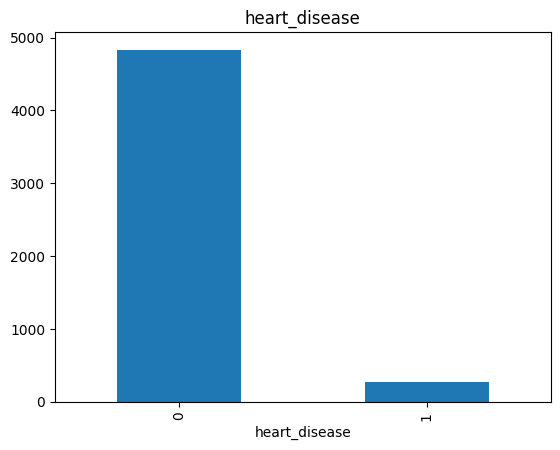

In [774]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

**Fitur Ever Married**

Melihat presentasi dari distribusi fitur ever married

              jumlah sampel  persentase
ever_married                           
Yes                    3353        65.6
No                     1757        34.4


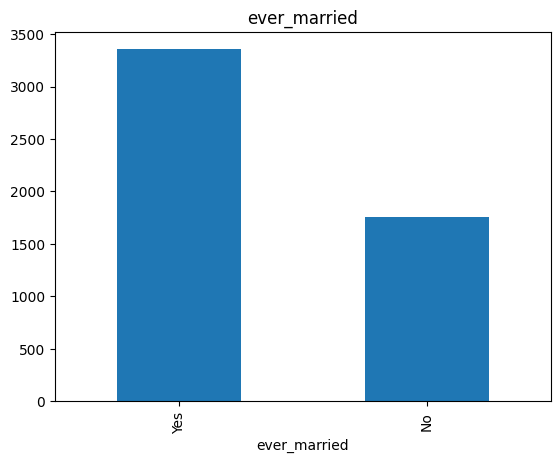

In [775]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

**Fitur Work Type**

Melihat presentasi dari distribusi fitur work type

               jumlah sampel  persentase
work_type                               
Private                 2925        57.2
Self-employed            819        16.0
children                 687        13.4
Govt_job                 657        12.9
Never_worked              22         0.4


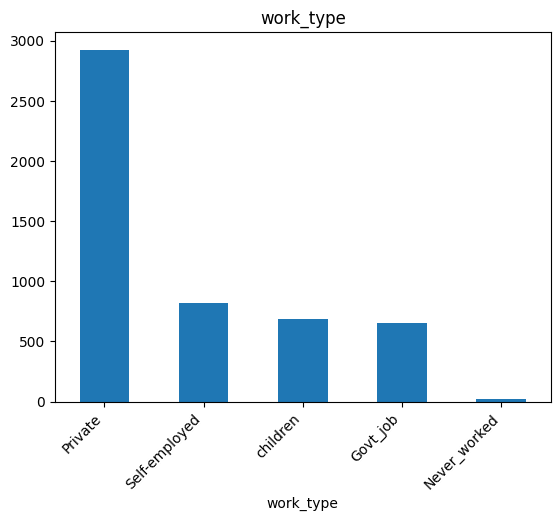

In [776]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);
ax = count.plot(kind='bar', title=feature)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

**Fitur Residence Type**

Melihat presentasi dari distribusi fitur residence type

                jumlah sampel  persentase
Residence_type                           
Urban                    2596        50.8
Rural                    2514        49.2


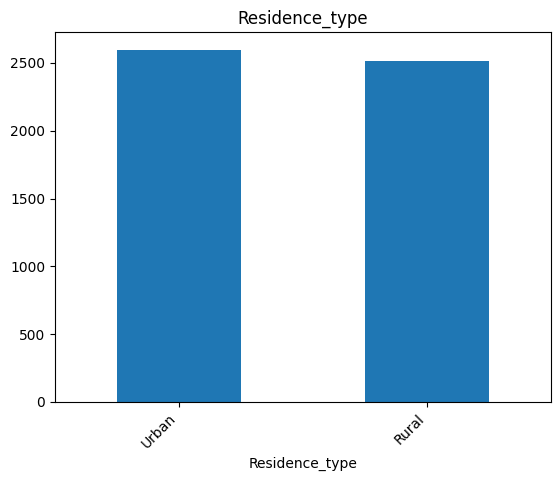

In [777]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);
ax = count.plot(kind='bar', title=feature)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()


**Fitur Smoking Status**

Melihat presentasi dari distribusi fitur smoking status

                 jumlah sampel  persentase
smoking_status                            
never smoked              1892        37.0
Unknown                   1544        30.2
formerly smoked            885        17.3
smokes                     789        15.4


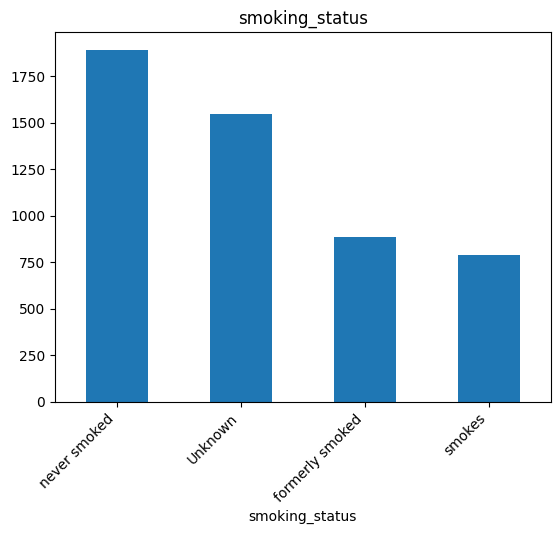

In [778]:
feature = categorical_features[6]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);
ax = count.plot(kind='bar', title=feature)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.show()

**Fitur Stroke**

Melihat presentasi dari distribusi fitur stroke

        jumlah sampel  persentase
stroke                           
0                4861        95.1
1                 249         4.9


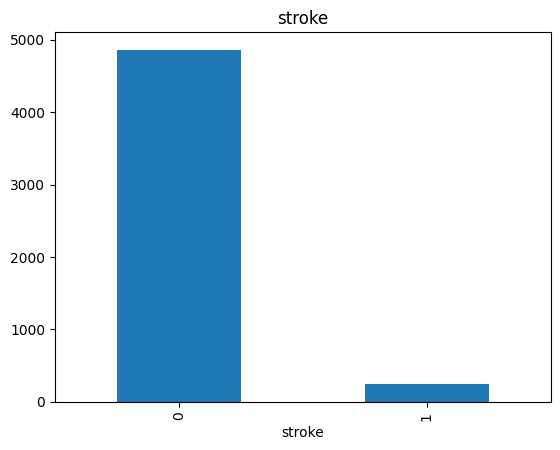

In [779]:
feature = categorical_features[7]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

#### Numerical Features

Melakukan list kolom yang berisi fitur numerikal.

In [780]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

Melihat distribusi dari fitur-fitur numerikal.

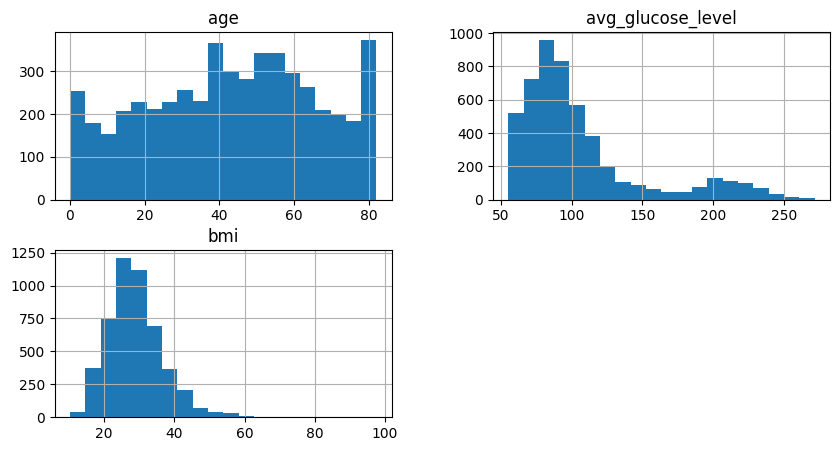

In [781]:
df[numerical_features].hist(bins=20, figsize=(10, 5))
plt.show()

#### **Multivariate Analysis**

#### Categorical Features

Melihat sebaran pasien stroke dan tidak stroke berdasarkan masin-masing fitur kategorikal.

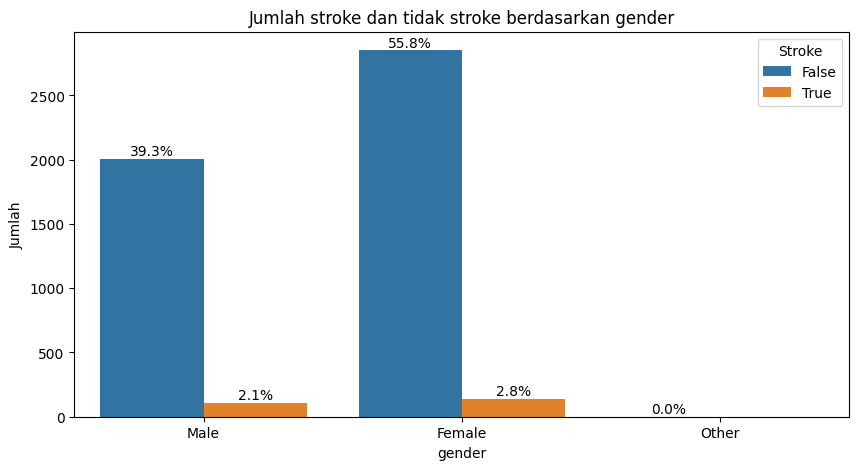

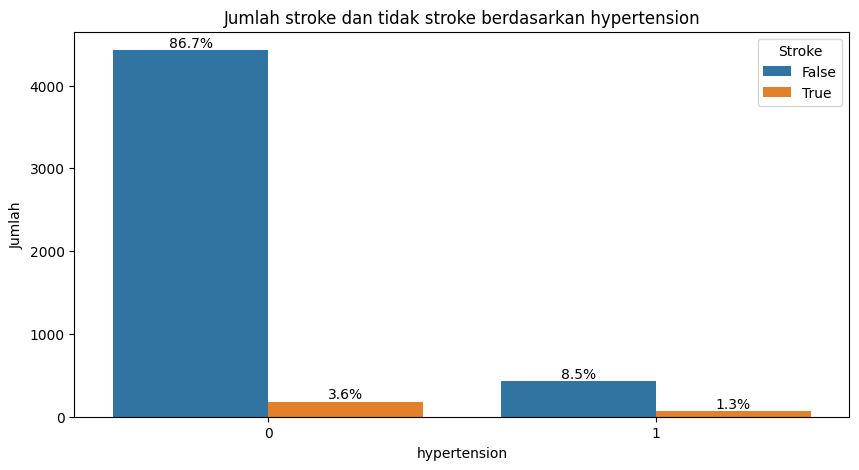

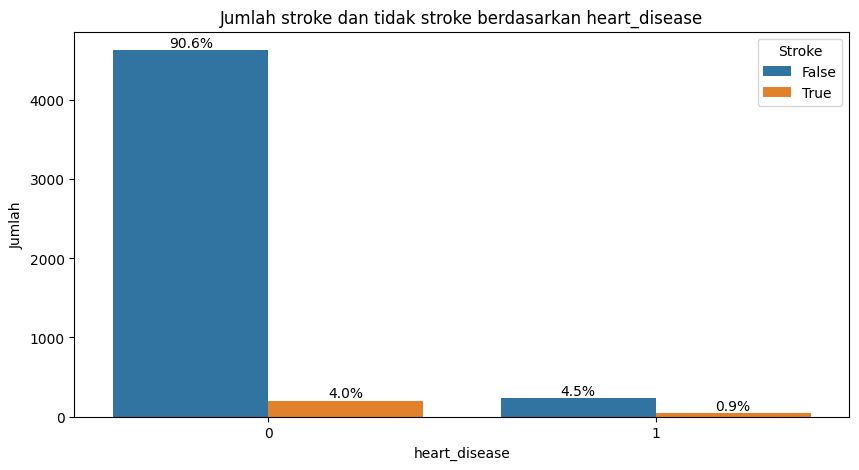

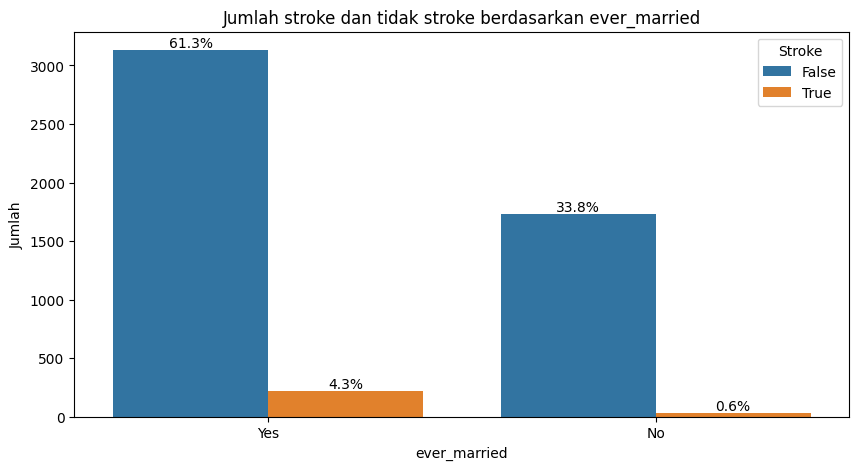

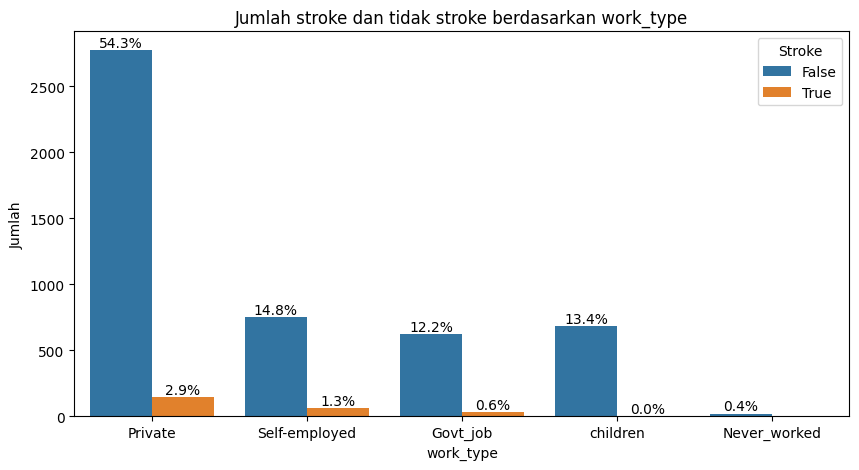

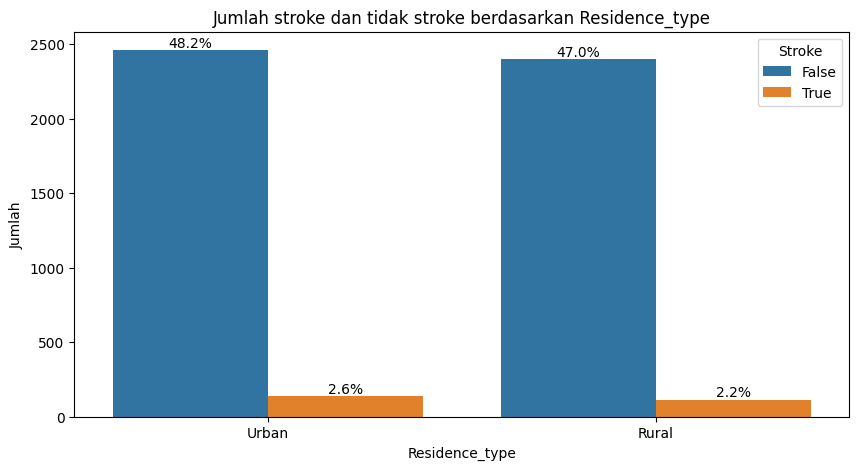

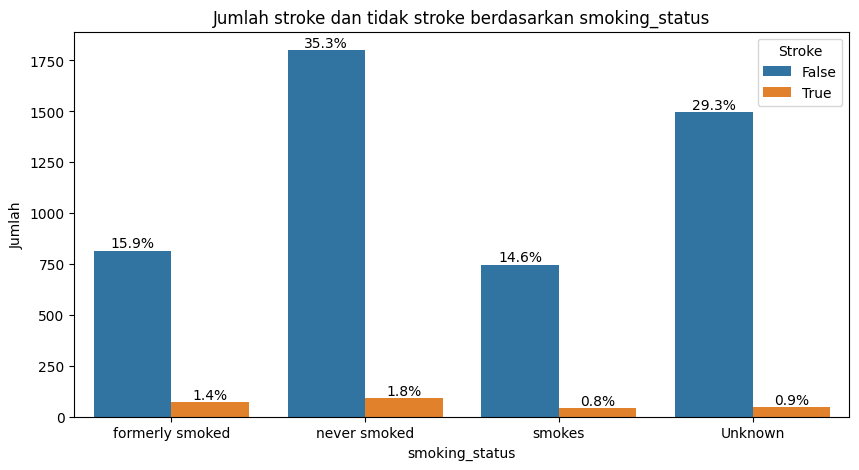

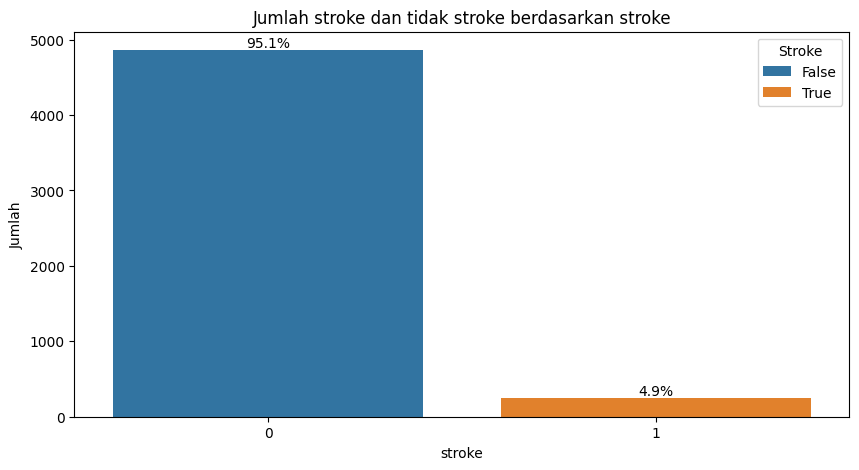

In [782]:
for col in categorical_features:
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col, hue='stroke', data=df)
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['False', 'True'], title='Stroke')
    
    ax.set_title('Jumlah stroke dan tidak stroke berdasarkan {}'.format(col))
    ax.set_xlabel(col)
    ax.set_ylabel('Jumlah')
    
    total_count = len(df[col])
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total_count)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        if y > 0:
            ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.show()


#### Numerical Features

Melihat sebaran pasien stroke dan tidak stroke berdasarkan masin-masing fitur numerikal.

<Figure size 1000x800 with 0 Axes>

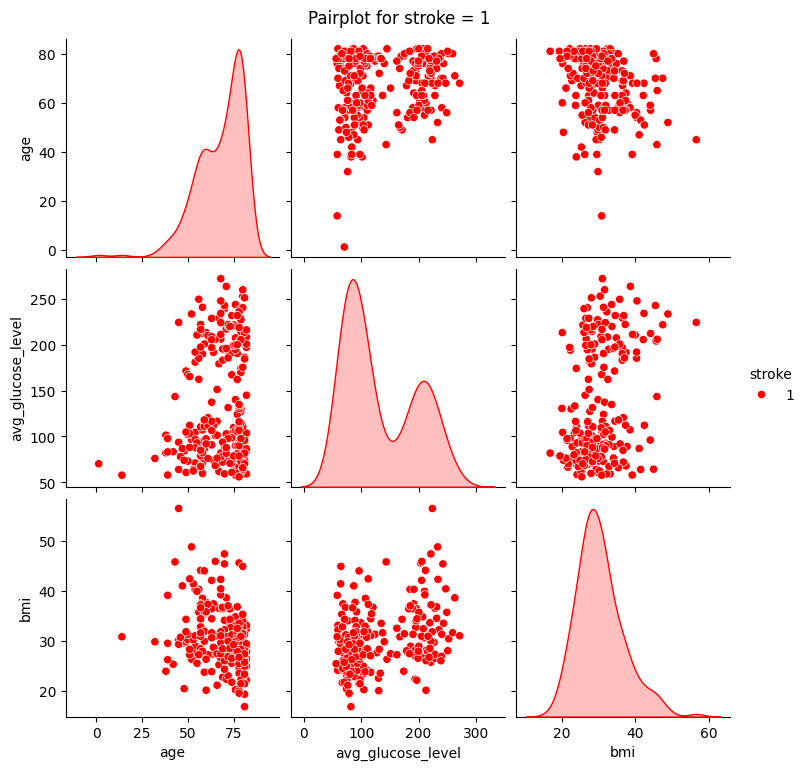

<Figure size 1000x800 with 0 Axes>

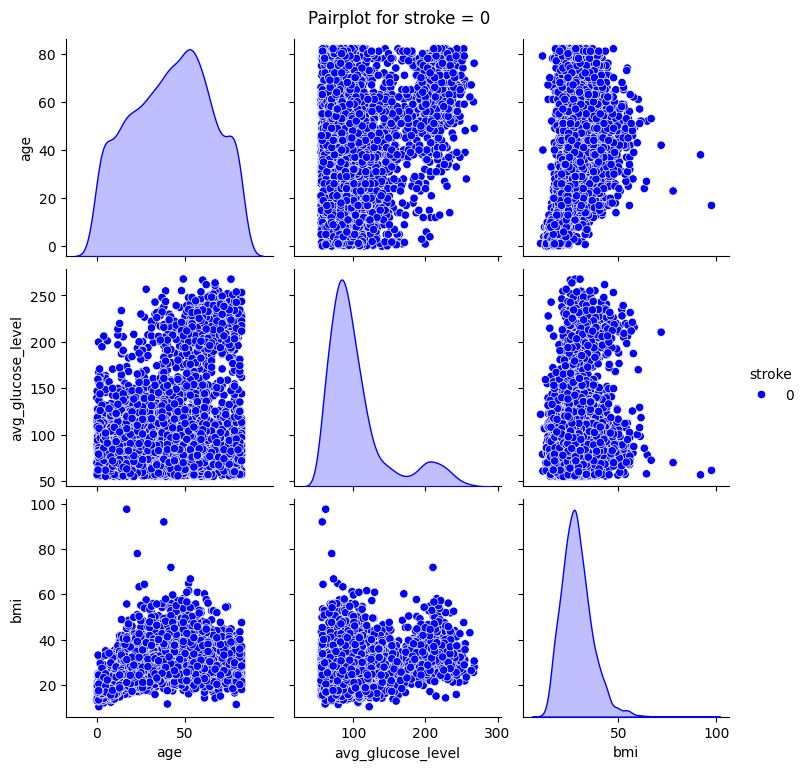

In [783]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']

plt.figure(figsize=(10, 8))
sns.pairplot(df[df['stroke'] == 1], hue='stroke', vars=numerical_features, diag_kind='kde', height=2.5, palette={1: 'red'})
plt.suptitle("Pairplot for stroke = 1", y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
sns.pairplot(df[df['stroke'] == 0], hue='stroke', vars=numerical_features, diag_kind='kde', height=2.5, palette={0: 'blue'})
plt.suptitle("Pairplot for stroke = 0", y=1.02)
plt.show()

Melihat korelasi antar fitur numerikal untuk pasien stroke.

Text(0.5, 1.0, 'Korelasi antar fitur numerik stroke')

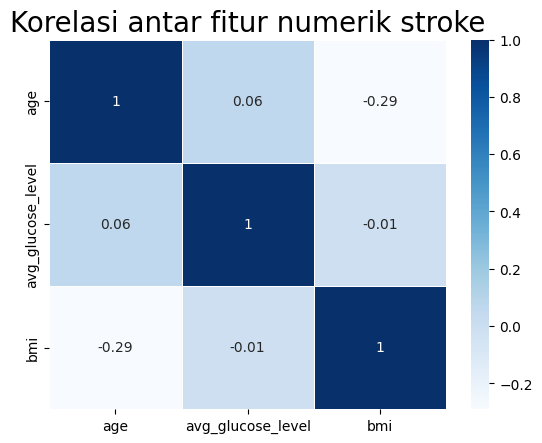

In [876]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
correlation_matrix = df[df['stroke'] == 1][numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Korelasi antar fitur numerik stroke', size=20)  

Melihat korelasi antar fitur numerikal untuk pasien tidak stroke.

Text(0.5, 1.0, 'Korelasi antar fitur numerik tidak stroke')

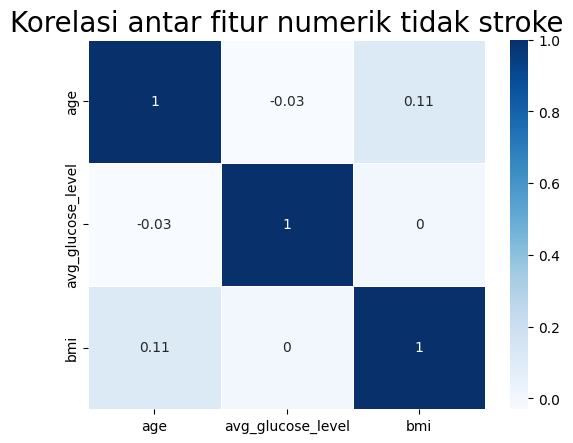

In [877]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
correlation_matrix = df[df['stroke'] == 0][numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Korelasi antar fitur numerik tidak stroke', size=20)  

## **Data Preparation**

#### **Drop Unnecessary Features**

Menghapus kolom id karena tidak diperlukan untuk membangun model machine learning.

In [785]:
df.drop('id', axis=1, inplace=True)

#### **Drop Missing Value**

Melihat jumlah missing value pada dataset

In [786]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Menghapus baris yang mengandung missing value

In [787]:
df.dropna(inplace=True)

#### **Drop Outlier**

Melihat outlier pada fitur-fitur numerikal dengan boxplot

Text(0.5, 1.0, 'Boxplot of BMI')

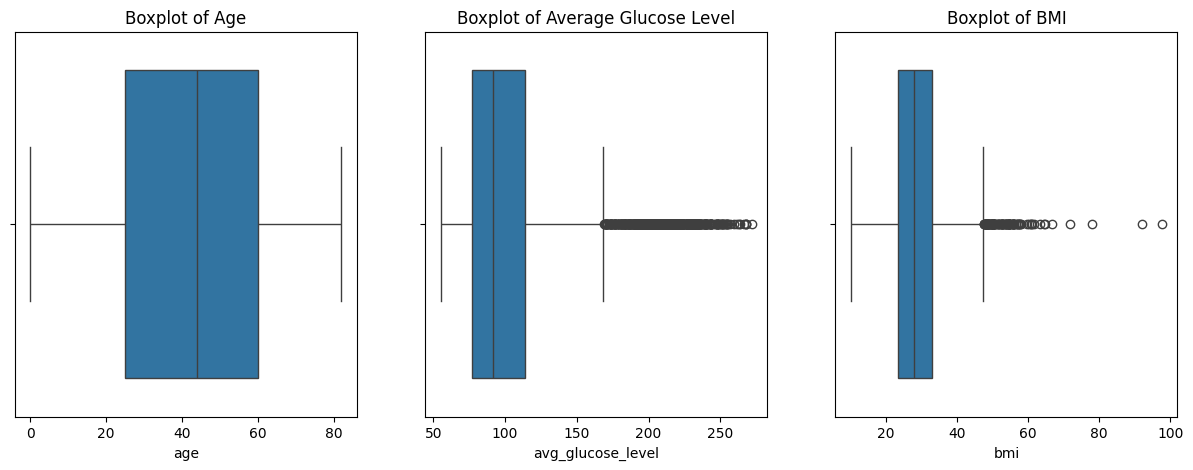

In [788]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='age', data=df, ax=axes[0])
axes[0].set_title('Boxplot of Age')

sns.boxplot(x='avg_glucose_level', data=df, ax=axes[1])
axes[1].set_title('Boxplot of Average Glucose Level')

sns.boxplot(x='bmi', data=df, ax=axes[2])
axes[2].set_title('Boxplot of BMI')

Menghapus outlier pada fitur-fitur numerikal

In [789]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

df.shape

(4260, 11)

#### **Imputation**

Menghapus data yang bernilai `Other` pada fitur gender

In [790]:
df = df[df[feature] != 'Other']

Menghapus data yang bernilai `Unknown` pada fitur smoking status

In [791]:
df = df[df['smoking_status'] != 'Unknown']

Mengubah nilai formerly smoked dan formerly smoked menjadi `1` dan never smoked menjadi `0` pada fitur smoking status

In [792]:
df['smoking_status'] = df['smoking_status'].map({'formerly smoked': 1, 'smokes': 1, 'never smoked': 0})

#### **Encoding Fitur Kategori**

Melakukan encoding pada fitur kategorikal menggunakan metode One Hot Encoding

In [793]:
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_features:
  df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)

df.drop(categorical_features, axis=1, inplace=True)

df.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,...,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_0,smoking_status_1
2,80.0,105.92,32.5,1,False,True,False,True,False,False,...,True,False,False,True,False,False,True,False,True,False
6,74.0,70.09,27.4,1,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,True,False
7,69.0,94.39,22.8,1,True,False,False,True,False,True,...,False,False,False,True,False,False,False,True,True,False
10,81.0,80.43,29.7,1,True,False,False,False,True,True,...,True,False,False,True,False,False,True,False,True,False
11,61.0,120.46,36.8,1,True,False,False,True,False,False,...,True,True,False,False,False,False,True,False,False,True


#### **Train Test Split**

Membagi dataset menjadi data train dan data test dengan perbandingan 80:20

In [794]:
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Jumlah data:', df.shape[0])
print('Jumlah data train:', X_train.shape[0])
print('Jumlah data test:', X_test.shape[0])

Jumlah data: 2879
Jumlah data train: 2303
Jumlah data test: 576


#### **Oversampling**

Melakukan oversampling pada data train untuk menangani masalah ketidakseimbangan kelas

In [795]:
smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

print('Jumlah data train setelah resampling:', X_train.shape[0])
print('Jumlah data train stroke = 0:', y_train.value_counts()[0])
print('Jumlah data train stroke = 1:', y_train.value_counts()[1])

Jumlah data train setelah resampling: 4420
Jumlah data train stroke = 0: 2210
Jumlah data train stroke = 1: 2210


#### **Standarisasi Fitur Latih Numerik**

Melakukan standarisasi pada fitur-fitur numerik pada data train

In [796]:
numerical_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_train.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1,...,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_0,smoking_status_1
0,-1.337307,-0.092840,1.255357,False,True,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True
1,-0.299138,0.674238,0.330263,True,False,False,True,False,True,False,...,True,True,False,False,False,False,True,False,True,False
2,0.790941,0.976669,0.274758,True,False,False,False,True,True,False,...,True,False,False,False,True,False,True,False,True,False
3,0.583307,-1.471654,-0.520823,True,False,False,True,False,True,False,...,True,False,False,True,False,False,True,False,False,True
4,-0.402955,-1.494565,0.108241,False,True,False,True,False,True,False,...,True,False,False,True,False,False,False,True,False,True


Melihat hasil standarisasi pada data train

In [797]:
X_train[numerical_features].describe().round(4)

,age,avg_glucose_level,bmi
count,4420.0000,4420.0000,4420.0000
mean,-0.0000,-0.0000,0.0000
std,1.0001,1.0001,1.0001
min,-2.4274,-1.6352,-3.2406
25%,-0.6625,-0.7749,-0.7243
50%,0.0130,-0.1036,-0.1011
75%,0.9986,0.5905,0.5523
max,1.3100,3.5441,3.4201


## **Modelling**

#### **Grid Search**

Melakukan grid search untuk mencari parameter terbaik pada tiap model machine learning yang digunakan

In [798]:
def grid_search(X, y):
    algos = {
        'KNN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [5, 10, 15, 20, 25, 30],
                'weights': ['uniform', 'distance'],
                'leaf_size': [10, 20, 30, 40, 50],
                'p': [1, 2]
            }
        },
        'RandomForest': {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [100, 200, 300, 400, 500],
                'max_depth': [5, 10, 15, 20, 25, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4]
            }
        },
        'Boosting': {
            'model': AdaBoostClassifier(),
            'params': {
                'n_estimators': [100, 200, 300, 400, 500],
                'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
            }
        }
    }

    score = []
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        score.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(score, columns=['model', 'best_score', 'best_params']).set_index('model')


grid_model = grid_search(X_train, y_train)

Melihat parameter terbaik pada tiap model machine learning yang digunakan dari hasil grid search

In [799]:
# parameter terbaik untuk masing-masing model
for i in range(len(grid_model)):
    print('Model:', grid_model.index[i])
    print('Best score:', grid_model.iloc[i]['best_score'])
    print('Best params:', grid_model.iloc[i]['best_params'])
    print()

Model: KNN
Best score: 0.9739819004524886
Best params: {'leaf_size': 10, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}

Model: RandomForest
Best score: 0.978733031674208
Best params: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}

Model: Boosting
Best score: 0.9678733031674207
Best params: {'learning_rate': 0.3, 'n_estimators': 400}



#### **Modelling with Best Parameter**

Membuat dataframe kosong untuk menyimpan hasil evaluasi dari tiap model machine learning yang digunakan

In [800]:
models = pd.DataFrame(
  index = ['accuracy', 'precision', 'recall', 'f1-score'],
  columns = ['KNN', 'RandomForest', 'Boosting']
)

Melatih model KNN dengan parameter terbaik yang didapatkan dari grid search dan menyimpan hasil evaluasi dari tiap model machine learning yang digunakan

In [801]:
n_neighbors = grid_model.loc['KNN', 'best_params']['n_neighbors']
weights = grid_model.loc['KNN', 'best_params']['weights']
leaf_size = grid_model.loc['KNN', 'best_params']['leaf_size']
p = grid_model.loc['KNN', 'best_params']['p']

knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, leaf_size=leaf_size, p=p)
knn.fit(X_train, y_train)

models.loc['accuracy', 'KNN'] = accuracy_score(y_test, knn.predict(X_test))
models.loc['precision', 'KNN'] = precision_score(y_test, knn.predict(X_test))
models.loc['recall', 'KNN'] = recall_score(y_test, knn.predict(X_test))
models.loc['f1-score', 'KNN'] = f1_score(y_test, knn.predict(X_test))

Melatih model Random Forest dengan parameter terbaik yang didapatkan dari grid search dan menyimpan hasil evaluasi dari tiap model machine learning yang digunakan

In [802]:
n_estimators = grid_model.loc['RandomForest', 'best_params']['n_estimators']
max_depth = grid_model.loc['RandomForest', 'best_params']['max_depth']
min_samples_split = grid_model.loc['RandomForest', 'best_params']['min_samples_split']
min_samples_leaf = grid_model.loc['RandomForest', 'best_params']['min_samples_leaf']

rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
rf.fit(X_train, y_train)

models.loc['accuracy', 'RandomForest'] = accuracy_score(y_test, rf.predict(X_test))
models.loc['precision', 'RandomForest'] = precision_score(y_test, rf.predict(X_test))
models.loc['recall', 'RandomForest'] = recall_score(y_test, rf.predict(X_test))
models.loc['f1-score', 'RandomForest'] = f1_score(y_test, rf.predict(X_test))

Melatih model Adaboost dengan parameter terbaik yang didapatkan dari grid search dan menyimpan hasil evaluasi dari tiap model machine learning yang digunakan

In [803]:
n_estimators = grid_model.loc['Boosting', 'best_params']['n_estimators']
learning_rate = grid_model.loc['Boosting', 'best_params']['learning_rate']

boosting = AdaBoostClassifier(n_estimators=n_estimators, learning_rate=learning_rate)
boosting.fit(X_train, y_train)

models.loc['accuracy', 'Boosting'] = accuracy_score(y_test, boosting.predict(X_test))
models.loc['precision', 'Boosting'] = precision_score(y_test, boosting.predict(X_test))
models.loc['recall', 'Boosting'] = recall_score(y_test, boosting.predict(X_test))
models.loc['f1-score', 'Boosting'] = f1_score(y_test, boosting.predict(X_test))

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Model Evaluation**

#### **Standarisasi Fitur Uji Numerik**

Melakukan standarisasi pada fitur-fitur numerik pada data test

In [804]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

#### **Accuracy**

Menampilkan akurasi dari tiap model machine learning yang digunakan dalam bentuk tabel

In [805]:
acc = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'Boosting'])
model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting}
for model_name, model in model_dict.items():
    acc.loc[model_name, 'train'] = accuracy_score(y_train, model.predict(X_train))
    acc.loc[model_name, 'test'] = accuracy_score(y_test, model.predict(X_test))

acc

,train,test
KNN,1.0,0.942708
RandomForest,0.993439,0.961806
Boosting,0.969231,0.949653


Menampilkan akurasi dari tiap model machine learning yang digunakan dalam bentuk grafik

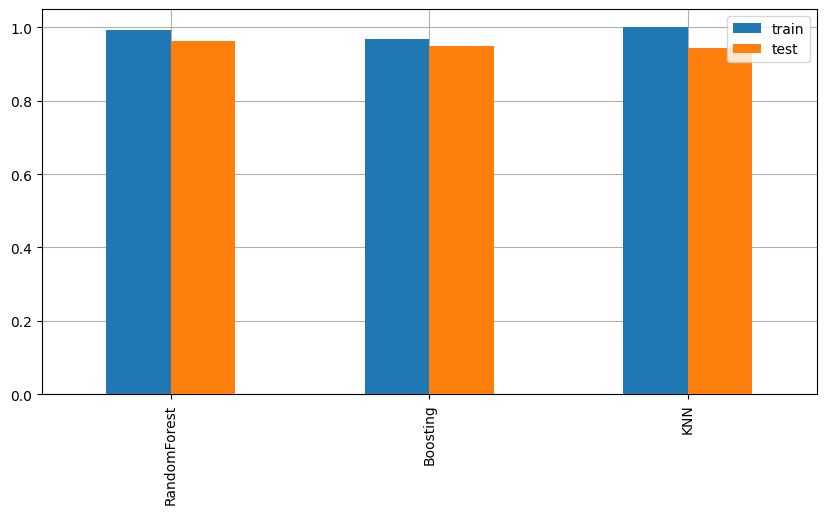

In [806]:
fig, ax = plt.subplots(figsize=(10, 5))
acc.sort_values(by='test', ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)

#### **Precision**

Menampilkan precision dari tiap model machine learning yang digunakan dalam bentuk tabel

In [807]:
prec = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'Boosting'])
model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting}
for model_name, model in model_dict.items():
    prec.loc[model_name, 'train'] = precision_score(y_train, model.predict(X_train))
    prec.loc[model_name, 'test'] = precision_score(y_test, model.predict(X_test))

prec

,train,test
KNN,1.0,0.125
RandomForest,1.0,0.0
Boosting,0.990539,0.0


Menampilkan precision dari tiap model machine learning yang digunakan dalam bentuk grafik

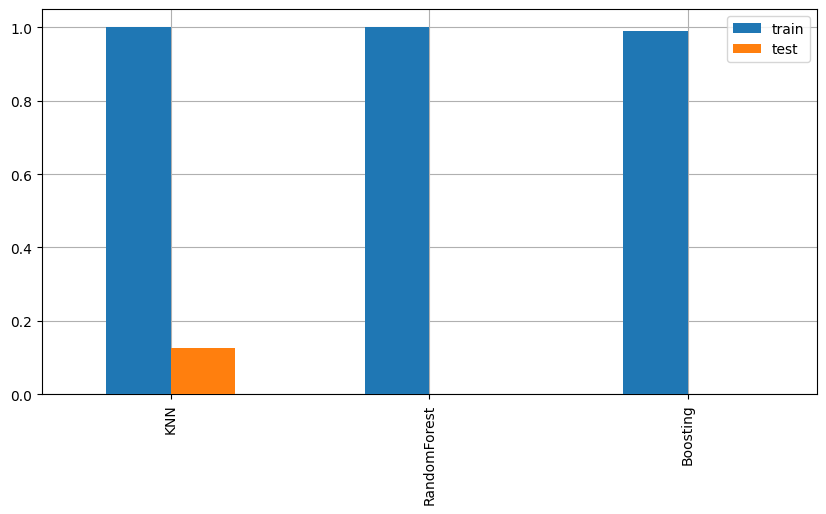

In [808]:
fig, ax = plt.subplots(figsize=(10, 5))
prec.sort_values(by='test', ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)

#### **Recall**

Menampilkan recall dari tiap model machine learning yang digunakan dalam bentuk tabel

In [809]:
rec = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'Boosting'])
model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting}
for model_name, model in model_dict.items():
    rec.loc[model_name, 'train'] = recall_score(y_train, model.predict(X_train))
    rec.loc[model_name, 'test'] = recall_score(y_test, model.predict(X_test))

rec

,train,test
KNN,1.0,0.095238
RandomForest,0.986878,0.0
Boosting,0.947511,0.0


Menampilkan recall dari tiap model machine learning yang digunakan dalam bentuk grafik

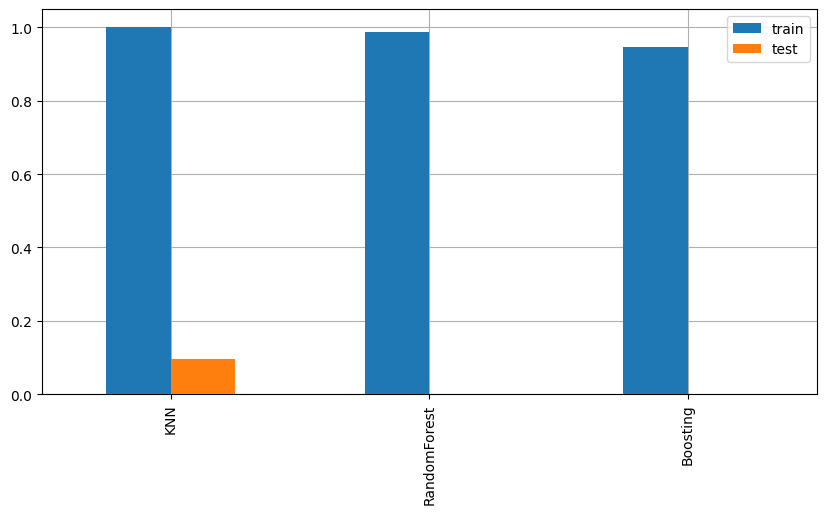

In [810]:
fig, ax = plt.subplots(figsize=(10, 5))
rec.sort_values(by='test', ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)

#### **F1 Score**

Menampilkan f1 score dari tiap model machine learning yang digunakan dalam bentuk tabel

In [811]:
f1 = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RandomForest', 'Boosting'])
model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting}
for model_name, model in model_dict.items():
    f1.loc[model_name, 'train'] = f1_score(y_train, model.predict(X_train))
    f1.loc[model_name, 'test'] = f1_score(y_test, model.predict(X_test))

f1

,train,test
KNN,1.0,0.108108
RandomForest,0.993396,0.0
Boosting,0.968548,0.0


Menaampilkan f1 score dari tiap model machine learning yang digunakan dalam bentuk grafik

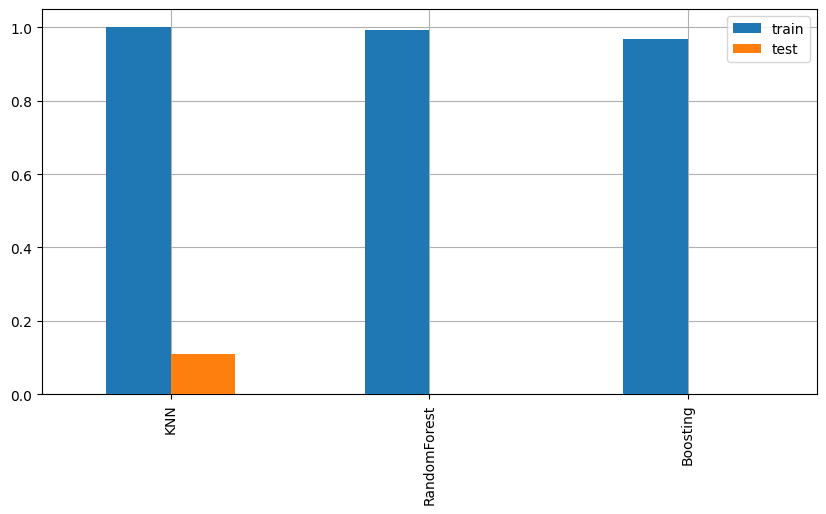

In [812]:
fig, ax = plt.subplots(figsize=(10, 5))
f1.sort_values(by='test', ascending=False).plot(kind='bar', ax=ax, zorder=3)
ax.grid(zorder=0)

#### **Confusion Matrix**

Menampilkan confusion matrix dari tiap model machine learning yang digunakan dalam bentuk tabel

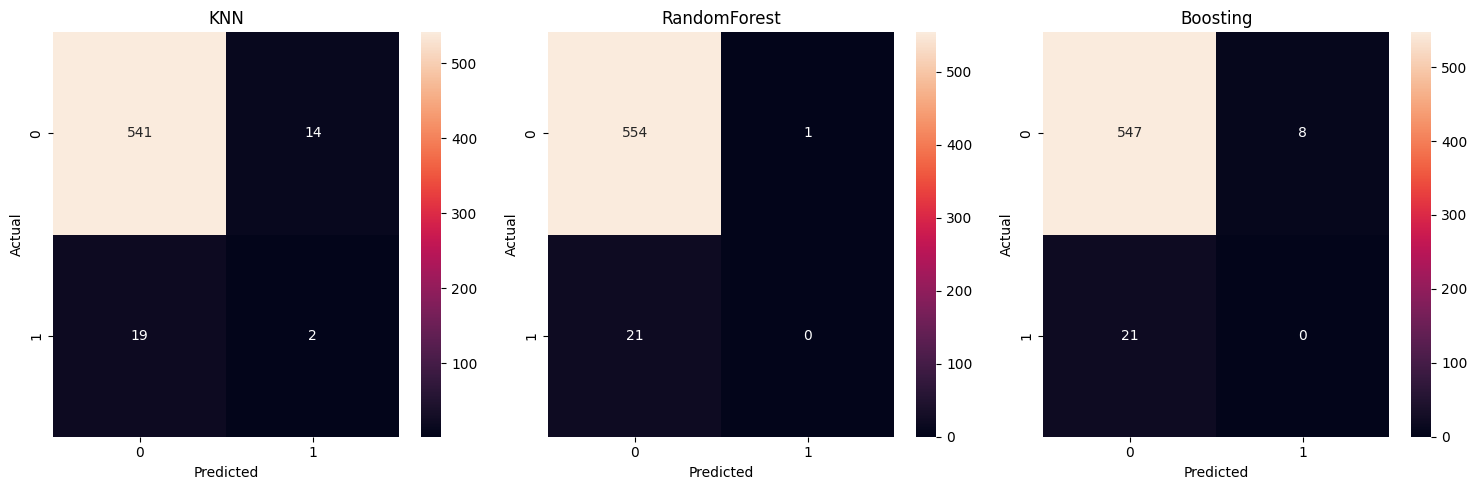

In [813]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting}
for ax, (model_name, model) in zip(axes, model_dict.items()):
    cm = confusion_matrix(y_test, model.predict(X_test))
    sns.heatmap(cm, annot=True, fmt='d', ax=ax)
    ax.set_title(model_name)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
plt.tight_layout()
plt.show()

#### **Predict with Data Test**

Melakukan prediksi dengan sample data test

In [980]:
data_stroke = df[df['stroke'] == 1]
data_not_stroke = df[df['stroke'] == 0]

prediksi = pd.concat([data_stroke.sample(5, random_state=None), data_not_stroke.sample(5, random_state=None)])
pred_dict = {'y_true': prediksi['stroke'].astype(int)}
for model_name, model in model_dict.items():
    pred_dict[model_name] = model.predict(prediksi.drop('stroke', axis=1))

pred = pd.DataFrame(pred_dict)
pred

,y_true,KNN,RandomForest,Boosting
88,1,0,0,0
148,1,0,0,0
239,1,1,0,0
214,1,0,0,0
118,1,0,0,0
4214,0,0,0,0
2314,0,0,0,0
4653,0,0,0,0
5080,0,0,0,0
2904,0,0,0,0
